In [14]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [15]:
def show_image(img, is_bgr, title, show_axis=False):
    if is_bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.title(title)
    plt.imshow(img)
    plt.savefig('/home/chence/Research/3DHeadGen/DatProc/temp/fastSAM_vis/{}.png'.format(title), bbox_inches='tight')
    if not show_axis:
        plt.axis('off')
    else:
        plt.axis('on')
    plt.show()

def check_same(ori_img, mask, name):
    msk_image = ori_img.copy()
    msk_image[mask == 0, :] = 127
    mask_c3 = mask[:, :, None].repeat(3, axis=2)
    vis_image = np.hstack([ori_img, msk_image, mask_c3])
    show_image(vis_image, is_bgr=False, title=name)

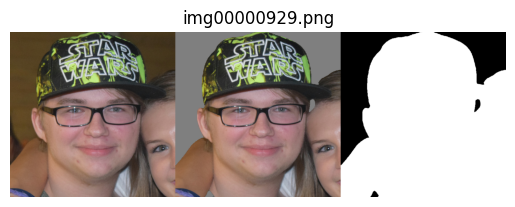

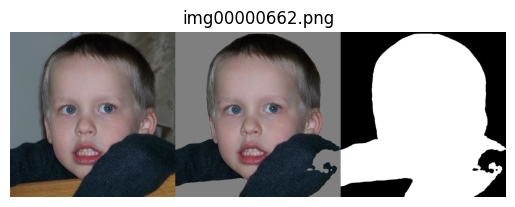

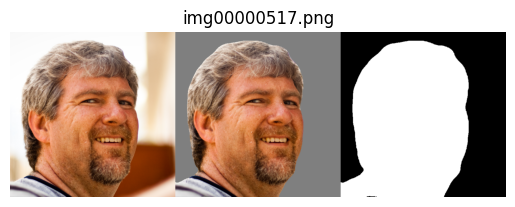

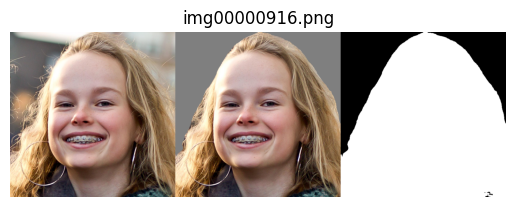

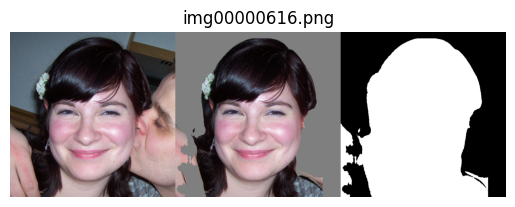

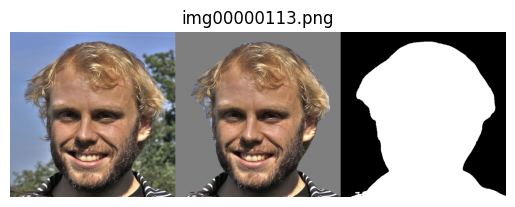

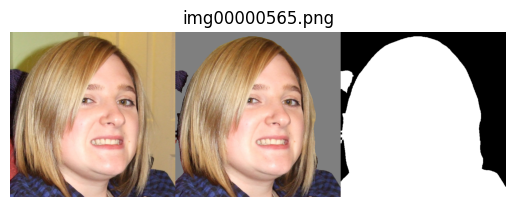

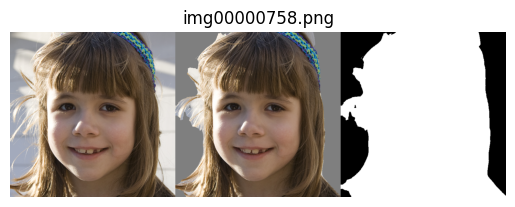

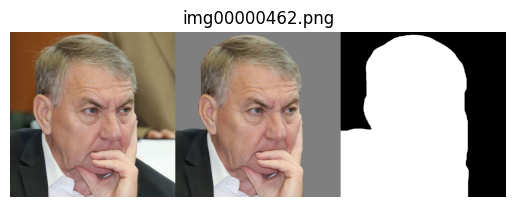

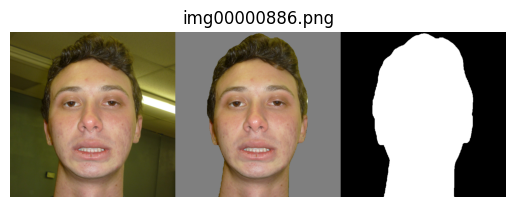

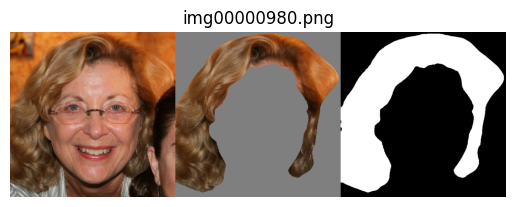

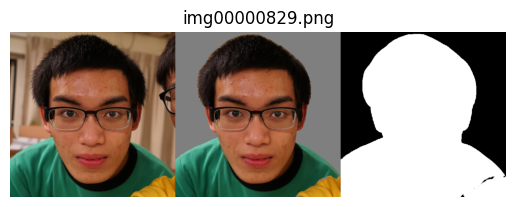

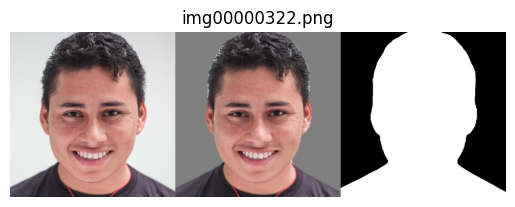

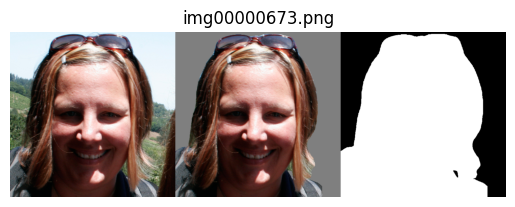

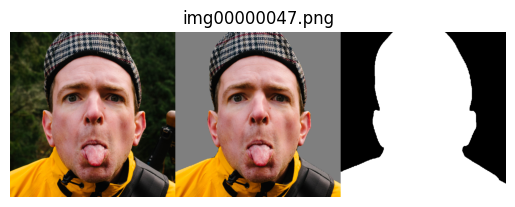

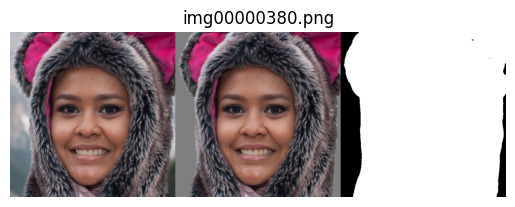

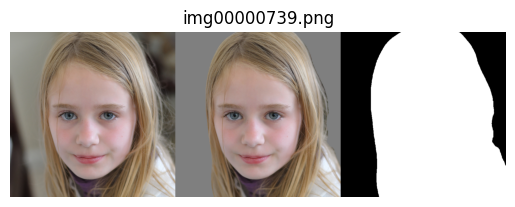

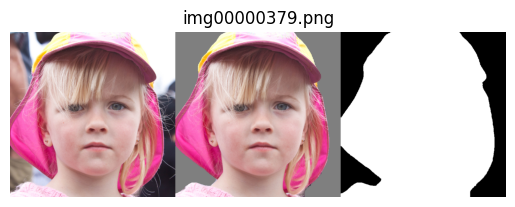

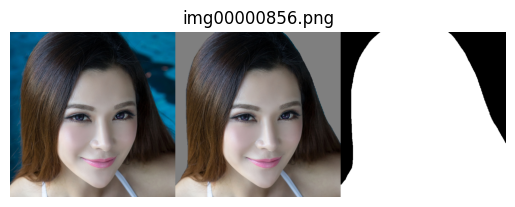

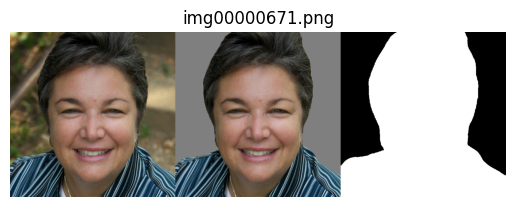

In [16]:
image_dir = '/home/chence/Research/3DHeadGen/DatProc/temp/00000'
mask_dir = '/home/chence/Research/3DHeadGen/DatProc/temp/00000_mask_FSAM'

vis_samples = 20
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    mask_path = os.path.join(mask_dir, image_name)
    image_data = cv2.imread(image_path)
    image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
    mask_data = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    check_same(image_data, mask_data, image_name)
    vis_samples -= 1
    if vis_samples == 0: break